# AML Assignment 5: Part 1 (Classifying Chickens and Ducks)

First, we download the two datasets containing images of ducks and chickens.

In [ ]:
!wget https://storage.googleapis.com/cvstock-932a9-h58gl/avchz68frybiwzc633dyeh.zip -O duck_images.zip

--2023-04-22 17:07:15--  https://storage.googleapis.com/cvstock-932a9-h58gl/avchz68frybiwzc633dyeh.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28429292 (27M) [application/zip]
Saving to: ‘duck_images.zip’

duck_images.zip     100%[===================>]  27.11M  63.7MB/s    in 0.4s    

2023-04-22 17:07:16 (63.7 MB/s) - ‘duck_images.zip’ saved [28429292/28429292]



In [ ]:
!wget https://storage.googleapis.com/cvstock-932a9-h58gl/b1hgh2e87dousf9yazlmfd.zip -O chicken_images.zip

--2023-04-22 17:07:16--  https://storage.googleapis.com/cvstock-932a9-h58gl/b1hgh2e87dousf9yazlmfd.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18949467 (18M) [application/zip]
Saving to: ‘chicken_images.zip’

chicken_images.zip  100%[===================>]  18.07M  34.2MB/s    in 0.5s    

2023-04-22 17:07:17 (34.2 MB/s) - ‘chicken_images.zip’ saved [18949467/18949467]



Then, we extract them.

In [ ]:
!rm -rf duck_images
!unzip duck_images.zip -d duck_images/

Archive:  duck_images.zip
   creating: duck_images/images.cv_avchz68frybiwzc633dyeh/
   creating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/
  inflating: duck_images/images.cv_avchz68frybiwzc633dyeh/readme.txt  
   creating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/test/
   creating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/train/
   creating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/val/
   creating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/test/animal duck/
  inflating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/test/animal duck/WF8QM3VXYAOH.jpg  
  inflating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/test/animal duck/Y7I4O5NR4LX9.jpg  
  inflating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/test/animal duck/GUI447C8RGYF.jpg  
  inflating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/test/animal duck/HUEUO5AOW3AQ.jpg  
  inflating: duck_images/images.cv_avchz68frybiwzc633dyeh/data/test/animal duck/I9BUEH2O6557.jpg

In [ ]:
!rm -rf chicken_images
!unzip chicken_images.zip -d chicken_images/

Archive:  chicken_images.zip
   creating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/
   creating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/
  inflating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/readme.txt  
   creating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/test/
   creating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/train/
   creating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/val/
   creating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/test/animal chicken/
   creating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/test/food indian_food tandoori chicken/
  inflating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/test/food indian_food tandoori chicken/HG57WTJ9CUB0.jpg  
  inflating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/test/food indian_food tandoori chicken/APZ5WD6P93XB.jpg  
  inflating: chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/test/food indian_food tandoori chicken/1P2IH6

Below we have a script which creates the train, validation and test data folders.

In [ ]:
%%bash
rm -rf data

mkdir -p data/train/
mkdir -p data/val
mkdir -p data/test

# move train data
cp -r chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/train/animal\ chicken data/train/chicken
cp -r duck_images/images.cv_avchz68frybiwzc633dyeh/data/train/animal\ duck data/train/duck

# move validation data
cp -r chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/val/animal\ chicken data/val/chicken
cp -r duck_images/images.cv_avchz68frybiwzc633dyeh/data/val/animal\ duck data/val/duck

# move test data
cp -r chicken_images/images.cv_b1hgh2e87dousf9yazlmfd/data/test/animal\ chicken data/test/chicken
cp -r duck_images/images.cv_avchz68frybiwzc633dyeh/data/test/animal\ duck data/test/duck


Next, we count the train-validation-test splits.

In [ ]:
# counting the train test splits
%%bash
echo "Training chicken images: " && ls data/train/chicken | wc -l
echo "Training duck images: " && ls data/train/duck | wc -l

echo "Validation chicken images: " && ls data/val/chicken | wc -l
echo "Validation chicken images: " && ls data/val/duck | wc -l

echo "Testing chicken images: " && ls data/test/chicken | wc -l
echo "Testing chicken images: " && ls data/test/duck | wc -l

Training chicken images: 
275
Training duck images: 
622
Validation chicken images: 
52
Validation chicken images: 
109
Testing chicken images: 
172
Testing chicken images: 
310


Next, we import the required libraries.

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

We then create `DataLoader` objects which will be used in training. We apply a few transformations to the original images, which are contained in teh `data_transforms` dictionary.

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Here is a simple function to visualize a few images.

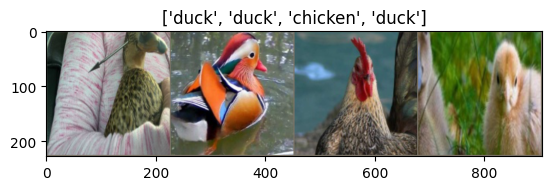

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Next, we define a function which will be used to train the model. The `num_epochs` argument specifies the number of epochs for which the model is to be trained. We train our model for 25 epochs.

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

Next, we initialize our model, and freeze all the parameters of the model. We then add a final layer to the model, whose output will be `len(class_names)` (which is 2 in our case). We use the `CrossEntropy` loss function, and we use the SGD optimizer to train the model. And finally, we start training the model.

In [ ]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 88.0MB/s]


Epoch 0/24
----------
train Loss: 0.4071 Acc: 0.7982
val Loss: 0.2190 Acc: 0.9006

Epoch 1/24
----------
train Loss: 0.3342 Acc: 0.8495
val Loss: 0.3250 Acc: 0.8944

Epoch 2/24
----------
train Loss: 0.3520 Acc: 0.8450
val Loss: 0.2154 Acc: 0.9068

Epoch 3/24
----------
train Loss: 0.3399 Acc: 0.8595
val Loss: 0.2134 Acc: 0.9006

Epoch 4/24
----------
train Loss: 0.3865 Acc: 0.8395
val Loss: 0.2076 Acc: 0.9130

Epoch 5/24
----------
train Loss: 0.4022 Acc: 0.8372
val Loss: 0.2143 Acc: 0.9193

Epoch 6/24
----------
train Loss: 0.5014 Acc: 0.8272
val Loss: 0.2304 Acc: 0.9193

Epoch 7/24
----------
train Loss: 0.3186 Acc: 0.8729
val Loss: 0.2680 Acc: 0.9130

Epoch 8/24
----------
train Loss: 0.2846 Acc: 0.8974
val Loss: 0.2233 Acc: 0.9130

Epoch 9/24
----------
train Loss: 0.3088 Acc: 0.8763
val Loss: 0.2186 Acc: 0.9130

Epoch 10/24
----------
train Loss: 0.3228 Acc: 0.8685
val Loss: 0.2243 Acc: 0.9317

Epoch 11/24
----------
train Loss: 0.2983 Acc: 0.8807
val Loss: 0.2242 Acc: 0.9130

Ep

Next, we set the model to evaluation mode, and load the test dataset.

In [ ]:
model_conv.eval()   # set the model to evaluation mode
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), data_transforms["val"])
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset),shuffle=True, num_workers=2)

Finally, we print the classification report of the model on the test dataset.

In [ ]:
# getting classification report
inputs, labels = next(iter(test_dataloader))
outputs = model_conv(inputs)
_, predictions = torch.max(outputs, 1)

tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(test_dataset)):
    label = labels[i].item()
    pred = predictions[i].item()

    if label == 0:
        if pred == 0:
            tn = tn + 1
        else:
            fp = fp + 1
    else:
        if pred == 0:
            fn = fn + 1
        else:
            tp = tp + 1

print("Precision: ", tp/(tp + fp))
print("Recall:" , tp/(tp + fn))
print("F1 Score: ", (2*tp)/(2*tp + fp + fn))

Precision:  0.9559748427672956
Recall: 0.9806451612903225
F1 Score:  0.9681528662420382
